## 4.10 Coding Etiquette & Excel Reporting Part 1

### 01. Import libraries & dataset

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Creating a path

path = r'C:\Users\Trac_\Documents\Instacart Basket Analysis'

In [4]:
# Import orders_products_merged.pkl

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl')) 

In [5]:
df.shape

(32404859, 28)

### 02. Address data security

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 28 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0.1            int64  
 1   Unnamed: 0              int64  
 2   order_id                int64  
 3   user_id                 int64  
 4   order_number            int64  
 5   orders_day_of_week      int64  
 6   order_hour_of_day       int64  
 7   days_since_prior_order  float64
 8   product_id              int64  
 9   add_to_cart_order       int64  
 10  reordered               int64  
 11  product_name            object 
 12  aisle_id                int64  
 13  department_id           int64  
 14  prices                  float64
 15  max_order               int64  
 16  loyalty_flag            object 
 17  avg_price               float64
 18  spending_flag           object 
 19  median_freq             float64
 20  order_freq_flag         object 
 21  gender                  objec

### 03. Create regional segmentation

In [7]:
# Create states within regions
region = []
for value in df['state']:
    if (value == 'Maine') or (value == 'New Hampshire') or (value == 'Vermont') or (value == 'Massachusetts') or (value == 'Rhode Island') or (value == 'Connecticut') or (value == 'New York') or (value == 'Pennsylvania') or (value =='New Jersey'):
        region.append('Northeast')
    elif (value == 'Wisconsin') or (value == 'Michigan') or (value == 'Illinois') or (value == 'Indiana') or (value == 'Ohio') or (value == 'North Dakota') or (value == 'South Dakota') or (value == 'Nebraska') or (value == 'Kansas') or (value == 'Minnesota') or (value == 'Iowa') or (value == 'Missouri'):
        region.append('Midwest')
    elif (value == 'Idaho') or (value == 'Montana') or (value == 'Wyoming') or (value == 'Nevada') or (value == 'Utah') or (value == 'Colorado') or (value == 'Arizona') or (value == 'New Mexico') or (value == 'Alaska') or (value == 'Washington') or (value == 'Oregon') or (value == 'California') or (value == 'Hawaii'):
        region.append('West')
    else:
        region.append('South')

In [8]:
# Create the region column
df['region'] = region

In [9]:
region_spending_cross = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [10]:
region_spending_cross

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [11]:
region_spending_cross.to_clipboard()

### 04. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample

In [12]:
df.loc[df['max_order'] < 5, 'low_order_flag'] = 'Low order customer'

In [13]:
df.loc[df['max_order'] >= 5, 'low_order_flag'] = 'High order customer'

In [14]:
df['low_order_flag'].value_counts(dropna = False)

High order customer    30964564
Low order customer      1440295
Name: low_order_flag, dtype: int64

In [17]:
# Create high order customer subset
df_high_order_customers = df[df['low_order_flag'] == 'High order customer']

In [16]:
# Exporting the sample as orders_products_high.pkl

df_high_order_customers.to_pickle(os.path.join(path,'02 Data','Prepared Data','high_order_customers.pkl'))

### 05. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

#### Age 

In [18]:
# Creating the age_flag

age_flag = []
for x in df['age'].tolist():
    if x <= 25:
        age_flag.append('Young')
    elif x > 25 and x < 65:
        age_flag.append('Middle-aged')
    elif x >= 65:
        age_flag.append('Senior')
    else:
        print('Weird value:', x)

In [19]:
# Adding age_flag to df as 'age_profile'

df['age_profile'] = age_flag

In [20]:
# Getting frequency distribution for 'age_profile'

df['age_profile'].value_counts(dropna = False)

Middle-aged    19784586
Senior          8575084
Young           4045189
Name: age_profile, dtype: int64

#### Income

In [21]:
# Creating the income_flag

income_flag = []
for x in df['income'].tolist():
    if x < 75000:
        income_flag.append('Low-income')
    elif x >= 75000 and x < 150000:
        income_flag.append('Mid-income')
    elif x >= 150000:
        income_flag.append('High-income')
    else:
        print('Weird value:', row)

In [22]:
# Adding income_flag to df as 'income_profile'

df['income_profile'] = income_flag

In [23]:
# Getting frequency distribution for 'income_profile'

df['income_profile'].value_counts(dropna = False)

Mid-income     17910512
Low-income     10442766
High-income     4051581
Name: income_profile, dtype: int64

#### Department 

In [24]:
# Creating a crosstab between 'department_id' and 'user_id'

dep_user_cross = pd.crosstab(df['department_id'], df['user_id'], dropna = False)

In [25]:
dep_user_cross

user_id,1,2,3,4,5,6,7,8,9,10,...,206200,206201,206202,206203,206204,206205,206206,206207,206208,206209
department_id,,,,,,,,,,,,,,,,,,,,,
1,0,17,6,3,2,0,4,0,1,1,...,21,18,25,14,10,2,76,21,26,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,2,0,2,0,0,5,0,4,0,...,1,38,17,3,4,2,2,3,62,9
4,5,36,38,2,19,6,57,27,7,72,...,135,33,48,36,13,7,34,50,197,19
5,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,3,0,0,2,0,0,1,0,1,...,0,2,10,0,2,0,4,1,3,1
7,13,9,3,3,0,0,51,0,8,0,...,24,83,28,19,0,1,33,20,20,10
8,0,0,0,0,0,0,1,0,0,0,...,0,12,0,0,1,0,0,0,0,0
9,0,0,4,0,1,0,0,1,0,0,...,1,24,0,0,2,0,1,8,17,3


In [26]:
# Assigning nutrition flags to users and storing them in a Python dictionary

vegan_dict = dict()
for user in dep_user_cross:
    workinglist = dep_user_cross[user].tolist()
    if workinglist[11] == 0 and workinglist[15] == 0:   # the index starts at 0, so index 0 corresponds to dep_id=1
        vegan_dict[user] = 'Vegan'
    else:
        vegan_dict[user] = 'Non-vegan'

In [27]:
# Assigning user flags to the vegan_flag

vegan_flag = []
for user in df['user_id']:
    vegan_flag.append(vegan_dict[user])

In [28]:
# Adding vegan_flag to df as 'vegan_profile'

df['vegan_profile'] = vegan_flag

In [29]:
# Getting frequency distribution for 'vegan_profile'

df['vegan_profile'].value_counts(dropna = False)

Non-vegan    32021432
Vegan          383427
Name: vegan_profile, dtype: int64

#### Family status 

In [30]:
df['family_status'].value_counts(dropna = False)

married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: family_status, dtype: int64

In [31]:
# Creating the 'family_profile' column and labeling the 'married no children' customers

df.loc[(df['family_status'] == 'married') & (df['number_of_dependants'] == 1), 'family_profile'] = 'Married no children'

In [32]:
# Creating the 'family_profile' column and labeling the 'married with children' customers

df.loc[(df['family_status'] == 'married') & (df['number_of_dependants'] >= 2), 'family_profile'] = 'Married with children'

In [33]:
# Creating the 'family_profile' column and labeling the 'single no children' customers

df.loc[(df['family_status'] != 'married') & (df['number_of_dependants'] == 0), 'family_profile'] = 'Single no children'

In [34]:
# Creating the 'family_profile' column and labeling the 'single with children' customers

df.loc[(df['family_status'] != 'married') & (df['number_of_dependants'] >= 1), 'family_profile'] = 'Single with children'

In [35]:
# Getting frequency distribution for 'family_profile'

df['family_profile'].value_counts(dropna = False)

Married with children    15205849
Single no children        8097503
Married no children       7550904
Single with children      1550603
Name: family_profile, dtype: int64

### 06. Create an appropriate visualization to show the distribution of profiles.

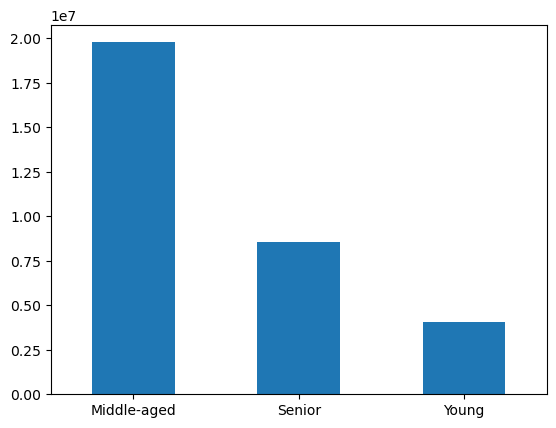

In [36]:
# age_profile

age_profile_bar = df['age_profile'].value_counts().plot.bar(rot=0)

In [37]:
# Exporting the viz

age_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_profile_bar.png'))

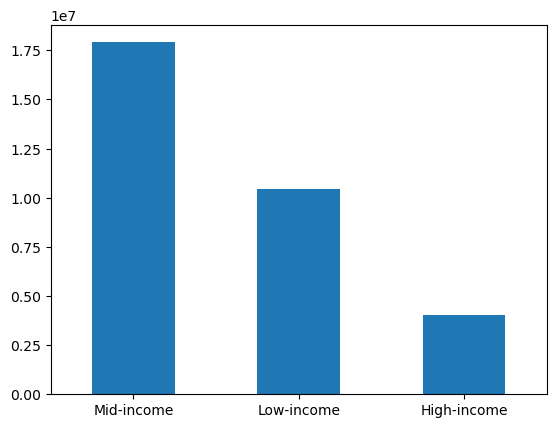

In [38]:
# income_profile

income_profile_bar = df['income_profile'].value_counts().plot.bar(rot=0)

In [39]:
# Exporting the viz

income_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_profile_bar.png'))

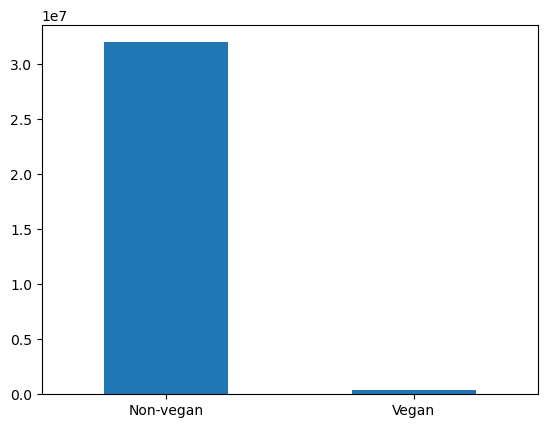

In [40]:
# vegan_profile

vegan_profile_bar = df['vegan_profile'].value_counts().plot.bar(rot=0)

In [41]:
# Exporting the viz

vegan_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vegan_profile_bar.png'))

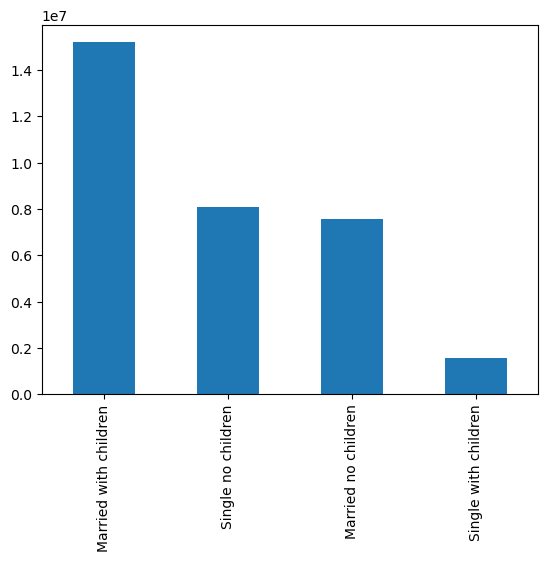

In [42]:
# family_profile

family_profile_bar = df['family_profile'].value_counts().plot.bar()

In [43]:
# Exporting the viz

family_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_profile_bar.png'))

### 07. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

#### Age

In [44]:
# age_profile stats

df.groupby('age_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices           
                              mean    max  min      mean   max  min
age_profile                                                        
Middle-aged              74.333637  999.0  0.0  7.789660  25.0  1.0
Senior                   74.459253  999.0  0.0  7.796546  25.0  1.0
Young                    74.567177  999.0  0.0  7.785748  25.0  1.0

#### Income 

In [45]:
# income_profile stats

df.groupby('income_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices           
                                 mean    max  min      mean   max  min
income_profile                                                        
High-income                 71.769128  999.0  0.0  7.946928  25.0  1.0
Low-income                  77.154766  999.0  0.0  7.434729  25.0  1.0
Mid-income                  73.381783  999.0  0.0  7.963487  25.0  1.0

#### Veganism

In [46]:
# vegan_profile stats

df.groupby('vegan_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices           
                                mean    max  min      mean   max  min
vegan_profile                                                        
Non-vegan                  73.631047  999.0  0.0  7.800348  25.0  1.0
Vegan                     138.282781  999.0  0.0  7.009920  20.0  1.0

#### Family Status

In [47]:
# family_profile stats

df.groupby('family_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices           
                                        mean    max  min      mean   max  min
family_profile                                                               
Married no children                74.751473  999.0  0.0  7.795712  25.0  1.0
Married with children              74.328029  999.0  0.0  7.788203  25.0  1.0
Single no children                 74.297240  999.0  0.0  7.789975  25.0  1.0
Single with children               73.847915  999.0  0.0  7.800712  25.0  1.0

### 08. Compare your customer profiles with regions and departments.

#### Age

In [48]:
# Creating a crosstab comparing 'age_profile' and 'region', looking at column percentages
# normalize = 'columns' gives the column percentages

age_region_cross = pd.crosstab(df['age_profile'], df['region'], normalize = 'columns')

In [49]:
age_region_cross

region,Midwest,Northeast,South,West
age_profile,,,,
Middle-aged,0.614288,0.604208,0.609621,0.612686
Senior,0.262045,0.271531,0.262814,0.264573
Young,0.123666,0.124261,0.127565,0.122741


#### Income 

In [50]:
# Creating a crosstab comparing 'income_profile' and 'region', looking at column percentages
# normalize = 'columns' gives the column percentages

income_region_cross = pd.crosstab(df['income_profile'], df['region'], normalize = 'columns')

In [51]:
income_region_cross

region,Midwest,Northeast,South,West
income_profile,,,,
High-income,0.125827,0.123505,0.124372,0.126208
Low-income,0.319571,0.318405,0.323667,0.325550
Mid-income,0.554602,0.558090,0.551961,0.548242


#### Veganism

In [52]:
# Creating a crosstab comparing 'vegan_profile' and 'region', looking at column percentages
# normalize = 'columns' gives the column percentages

vegan_region_cross = pd.crosstab(df['vegan_profile'], df['region'], normalize = 'columns')

In [53]:
vegan_region_cross

region,Midwest,Northeast,South,West
vegan_profile,,,,
Non-vegan,0.988115,0.988159,0.988389,0.987934
Vegan,0.011885,0.011841,0.011611,0.012066


#### Family Status

In [54]:
# Creating a crosstab comparing 'family_profile' and 'region', looking at column percentages
# normalize = 'columns' gives the column percentages

family_region_cross = pd.crosstab(df['family_profile'], df['region'], normalize = 'columns')

In [55]:
family_region_cross

region,Midwest,Northeast,South,West
family_profile,,,,
Married no children,0.236932,0.236116,0.229883,0.231373
Married with children,0.464053,0.469197,0.470703,0.472141
Single no children,0.250772,0.247836,0.250342,0.249893
Single with children,0.048243,0.046851,0.049072,0.046593


#### Customer Profiles by Department

#### Age 

In [56]:
# Creating a crosstab comparing 'age_profile' and 'department_id', looking at row percentages
# normalize = 'index' gives row percentages

age_department_cross = pd.crosstab(df['age_profile'], df['department_id'], normalize = 'index')   

In [57]:
pd.set_option('display.max_columns', None)    # displays all columns

age_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
age_profile,,,,,,,,,,,,,,,,,,,,,
Middle-aged,0.068796,0.001122,0.036214,0.292547,0.004764,0.008312,0.082903,0.002938,0.026682,0.001057,0.013867,0.021732,0.057853,0.021718,0.032962,0.166679,0.022748,0.013210,0.089266,0.032507,0.002125
Senior,0.069232,0.001099,0.036096,0.293147,0.004552,0.008253,0.083362,0.003065,0.026698,0.001078,0.013691,0.022171,0.057956,0.021439,0.032937,0.166321,0.022966,0.012763,0.088689,0.032375,0.002110
Young,0.069212,0.001154,0.036198,0.291112,0.005046,0.008414,0.082342,0.003287,0.027146,0.001093,0.013798,0.021965,0.057796,0.022129,0.033000,0.166830,0.022662,0.013105,0.089228,0.032261,0.002225


#### Income

In [58]:
# Creating a crosstab comparing 'income_profile' and 'department_id', looking at row percentages
# normalize = 'index' gives row percentages

income_department_cross = pd.crosstab(df['income_profile'], df['department_id'], normalize = 'index')

In [59]:
income_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
income_profile,,,,,,,,,,,,,,,,,,,,,
High-income,0.071178,0.001172,0.038023,0.291115,0.006159,0.008462,0.080252,0.003335,0.027462,0.000931,0.013835,0.023628,0.059801,0.021438,0.034248,0.168907,0.023887,0.013435,0.078240,0.032334,0.002157
Low-income,0.067229,0.001114,0.034505,0.279570,0.004614,0.007760,0.091741,0.002845,0.024468,0.001184,0.013988,0.017992,0.055207,0.023537,0.030146,0.160883,0.023559,0.011447,0.113855,0.032205,0.002150
Mid-income,0.069473,0.001111,0.036741,0.300400,0.004498,0.008595,0.078442,0.003043,0.027908,0.001029,0.013704,0.023747,0.058992,0.020680,0.034309,0.169417,0.022102,0.013949,0.077139,0.032603,0.002119


#### Veganism

In [60]:
# Creating a crosstab comparing 'vegan_profile' and 'department_id'
# normalize = 'index' gives row percentages

vegan_department_cross = pd.crosstab(df['vegan_profile'], df['department_id'], normalize = 'index')

In [61]:
vegan_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
vegan_profile,,,,,,,,,,,,,,,,,,,,,
Non-vegan,0.069073,0.001104,0.036399,0.292392,0.004387,0.008358,0.081628,0.003010,0.026952,0.001059,0.013644,0.022139,0.058016,0.021700,0.033148,0.168598,0.022303,0.013163,0.088189,0.032604,0.002135
Vegan,0.059795,0.002470,0.017964,0.303800,0.034432,0.004222,0.193680,0.003484,0.009386,0.001750,0.027872,0.000000,0.045936,0.021263,0.017244,0.000000,0.063884,0.006045,0.165925,0.018809,0.002037


In [62]:
# This isn't a large df, so I'm going to do some work with it in Excel.  Copying to clipboard...

vegan_department_cross.to_clipboard()

#### Family Status

In [63]:
# Creating a crosstab comparing 'family_profile' and 'department_id'

family_department_cross = pd.crosstab(df['family_profile'], df['department_id'], normalize = 'index')
# normalize = 'index' gives row percentages

In [64]:
family_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
family_profile,,,,,,,,,,,,,,,,,,,,,
Married no children,0.068501,0.001134,0.036290,0.292094,0.004674,0.008405,0.082844,0.002980,0.026714,0.001107,0.013833,0.022041,0.058145,0.021909,0.033025,0.167336,0.022995,0.012703,0.089014,0.032144,0.002111
Married with children,0.069171,0.001094,0.036029,0.292561,0.004629,0.008221,0.083094,0.002960,0.026828,0.001070,0.013798,0.021994,0.057826,0.021590,0.033057,0.166058,0.022954,0.013235,0.089272,0.032420,0.002140
Single no children,0.068806,0.001133,0.036358,0.293355,0.004831,0.008362,0.083290,0.003036,0.026584,0.001022,0.013832,0.021498,0.057642,0.021559,0.032706,0.166639,0.022325,0.013151,0.089015,0.032744,0.002110
Single with children,0.069994,0.001232,0.036207,0.289970,0.005737,0.008432,0.080375,0.003624,0.026894,0.001080,0.013744,0.021915,0.058217,0.022398,0.033013,0.168184,0.022718,0.012992,0.088458,0.032513,0.002303


### 09. Produce suitable charts to illustrate your results and export them in your project folder.

#### Age

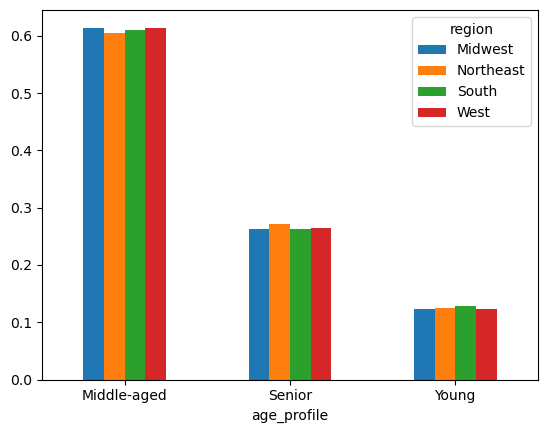

In [65]:
# age_profile by region

age_region_bar = age_region_cross.plot.bar(rot=0)

In [66]:
# Exporting viz

age_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region_bar.png'))

#### Income

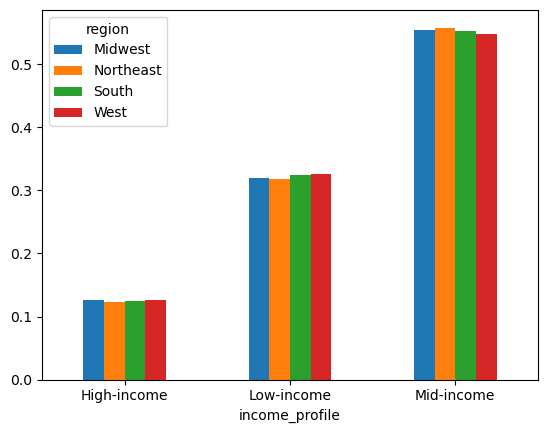

In [67]:
# income_profile by region

income_region_bar = income_region_cross.plot.bar(rot=0)

In [68]:
# Exporting viz

income_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_region_bar.png'))

#### Veganism

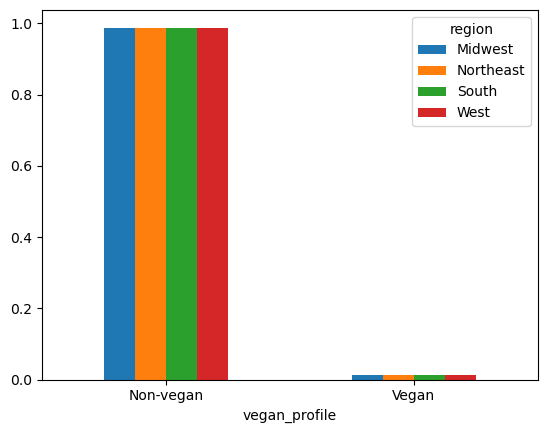

In [69]:
# vegan_profile by region

vegan_region_bar = vegan_region_cross.plot.bar(rot=0)

In [70]:
# Exporting viz

vegan_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vegan_region_bar.png'))

#### Family Status

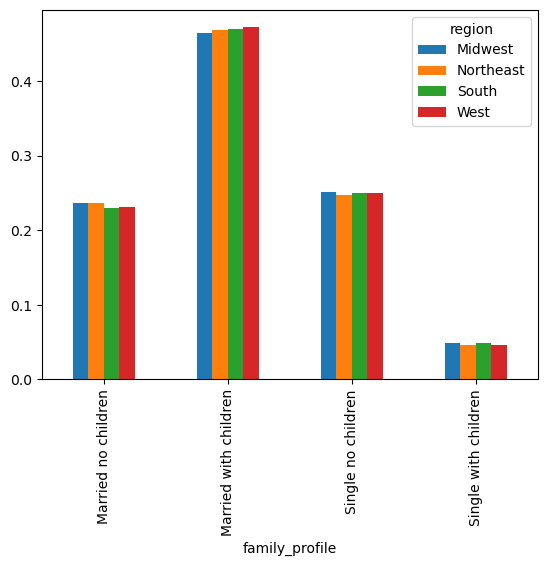

In [71]:
# family_profile by region

family_region_bar = family_region_cross.plot.bar()

In [72]:
# Exporting viz

family_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_region_bar.png'))

#### Visualizations for Profiles by Department

#### Age

In [73]:
# Creating a new crosstab so that the departments are on the x-axis

age_department_cros = pd.crosstab(df['department_id'], df['age_profile'])

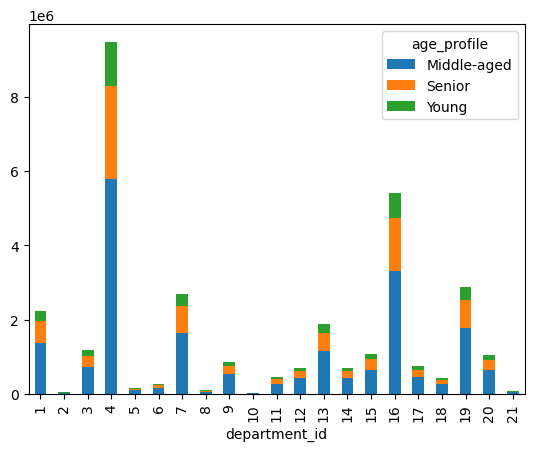

In [74]:
# Creating a stacked bar plot of the new crosstab

age_department_bar = age_department_cros.plot.bar(stacked = True)

In [75]:
# Exporting the viz

age_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_department_bar.png'))

#### Income

In [76]:
# Creating a new crosstab so that the departments are on the x-axis

income_department_cros = pd.crosstab(df['department_id'], df['income_profile'])

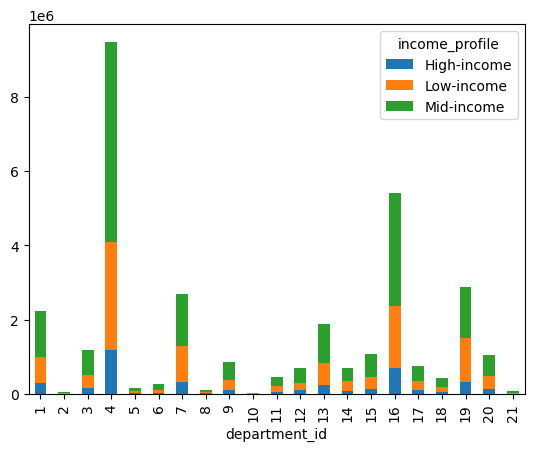

In [77]:
# Creating a stacked bar plot of the new crosstab

income_department_bar = income_department_cros.plot.bar(stacked = True)

In [78]:
# Exporting the viz

income_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_department_bar.png'))

#### Veganism

In [79]:
# Creating a new crosstab so that the departments are on the x-axis

vegan_department_cros = pd.crosstab(df['department_id'], df['vegan_profile'])

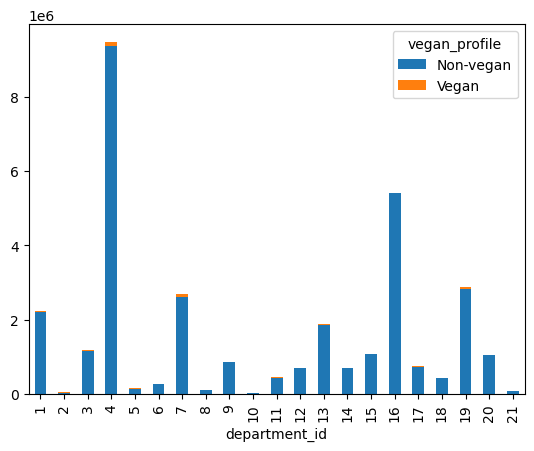

In [80]:
# Creating a stacked bar plot of the new crosstab

vegan_department_bar = vegan_department_cros.plot.bar(stacked = True)

In [81]:
# Exporting the viz

vegan_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vegan_department_bar.png'))

#### Family Status

In [82]:
# Creating a new crosstab so that the departments are on the x-axis

family_department_cros = pd.crosstab(df['department_id'], df['family_profile'])

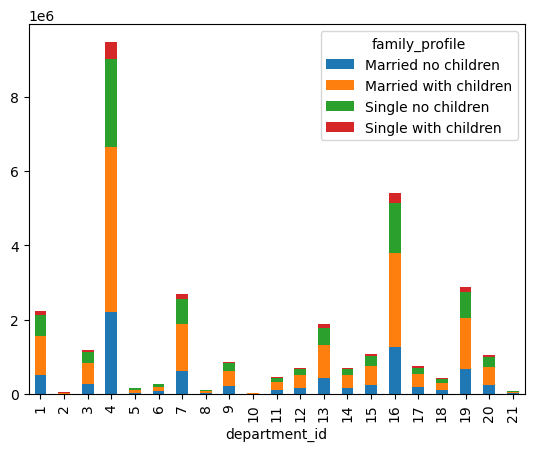

In [83]:
# Creating a stacked bar plot of the new crosstab

family_department_bar = family_department_cros.plot.bar(stacked = True)

In [84]:
# Exporting the viz

family_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_department_bar.png'))

### 10. Tidy up your script, export your final data set, and save your notebook.

In [85]:
# Exporting final data set as 

df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_final.pkl'))

### Extra Analysis 

In [86]:
# Creating a crosstab comparing 'region' and 'loyalty_flag'

region_loyalty_cross = pd.crosstab(df['region'], df['loyalty_flag'])

region_loyalty_cross

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1472573,3750978
Northeast,1841785,1100207,2780744
South,3405844,2074410,5311631
West,2662690,1596800,4033423


In [87]:
# Creating a crosstab comparing 'region' and 'loyalty_flag' with row percentages

region_loyalty_crossed = pd.crosstab(df['region'], df['loyalty_flag'], normalize = 'index')

region_loyalty_crossed

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,0.312449,0.193828,0.493724
Northeast,0.321836,0.192252,0.485912
South,0.315593,0.192219,0.492188
West,0.321080,0.192550,0.486370


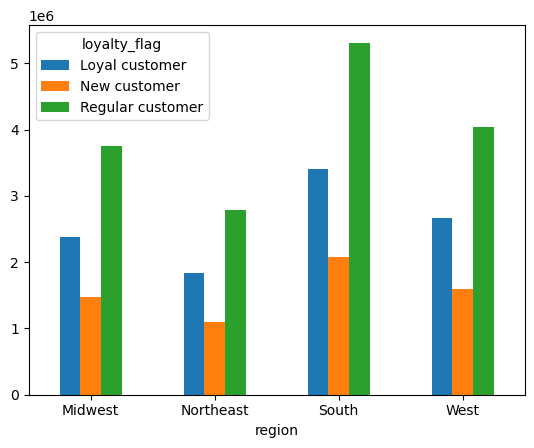

In [88]:
# Visualizing regional loyalty

region_loyalty_bar = region_loyalty_cross.plot.bar(rot=0)

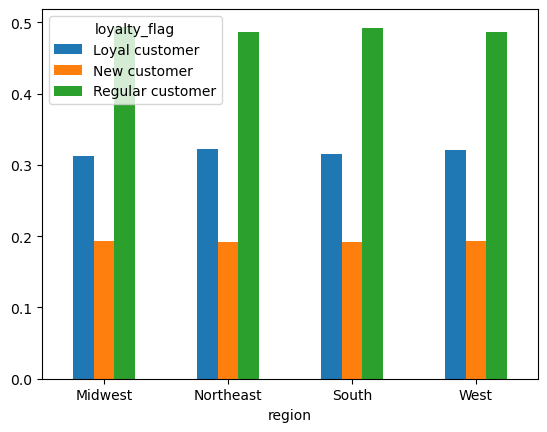

In [89]:
# Visualizing regional loyalty

region_loyalty_bar_2 = region_loyalty_crossed.plot.bar(rot=0)

In [90]:
# Exporting the visualizations above

region_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_loyalty_bar.png'))
region_loyalty_bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_loyalty_bar_2.png'))

In [96]:
# Creating the crosstab

spending_loyalty_crossed = pd.crosstab(df['spending_flag'], df['loyalty_flag'])

spending_loyalty_crossed

loyalty_flag,Loyal customer,New customer,Regular customer
spending_flag,,,
High spender,216600,114831,302814
Low spender,10067493,6129159,15573962


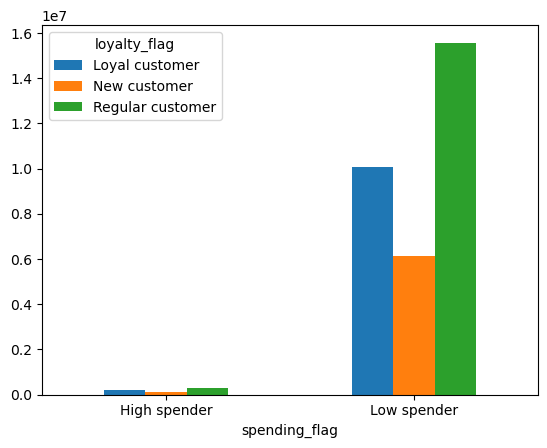

In [97]:
# Creating the viz

spending_loyalty_bar = spending_loyalty_crossed.plot.bar(rot=0)

In [98]:
# Exporting the viz

spending_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_loyalty_bar.png'))